<a href="https://colab.research.google.com/github/JannaBabicheva/Tour-region-econometrics/blob/main/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%81%D0%BF%D1%80%D0%BE%D1%81%D0%B0_%D0%BD%D0%B0_%D0%B2%D0%BD%D1%83%D1%82%D1%80%D0%B5%D0%BD%D0%BD%D0%B8%D0%B9_%D1%82%D1%83%D1%80%D0%B8%D0%B7%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка библиотек

In [1]:
# Установка библиотек
!pip install pulp
!pip install statsmodels
!pip install scikit-learn
!pip install pandas numpy matplotlib
!pip install pysal
!pip install linearmodels
!pip install spreg
# Установка библиотек
!pip install pandas numpy matplotlib seaborn scipy statsmodels linearmodels libpysal spreg esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from linearmodels.panel import PanelOLS
from linearmodels.iv import IV2SLS
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

from linearmodels.panel import RandomEffects


# Подключение диска

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Модели

Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'Region' переименован в 'region'.
✅ Размер обучающей выборки: 1423
✅ Размер тестовой выборки: 237

🧪 Проверка корреляции инструментов с эндогенной переменной:
Корреляция ln_price_adjusted_lag1 с ln_price_adjusted: 0.8072
Корреляция ln_salary_adjusted_lag1 с ln_price_adjusted: 0.4616

📉 Результаты модели IV-2SLS:
                          IV-2SLS Estimation Summary                          
Dep. Variable:        ln_nights_count   R-squared:                      0.9382
Estimator:                    IV-2SLS   Adj. R-squared:   

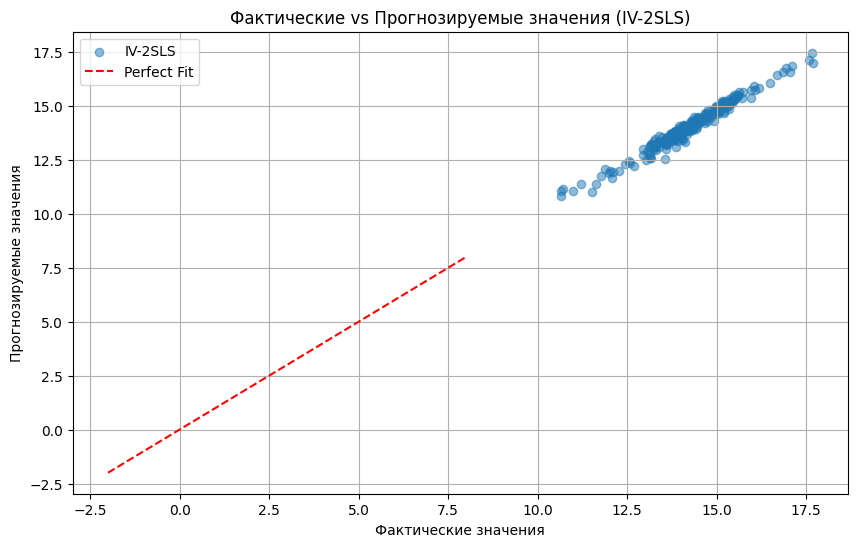

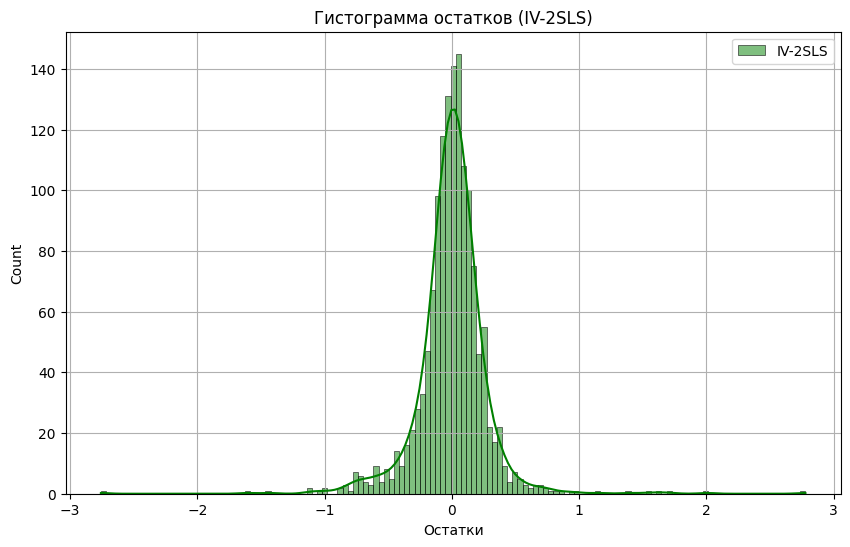

In [8]:

# Функции для подготовки данных
def calculate_vif(data):
    """Рассчитывает VIF для проверки мультиколлинеарности с константой."""
    X_vif = add_constant(data)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    return vif_data

def fix_region_column(df):
    """Исправляет название столбца региона."""
    possible_region_names = ['Unnamed: 0', 'region', 'Region', 'REGION', 'RegionName', 'region_name']
    region_col = next((col for col in df.columns if col.lower().strip() in [name.lower() for name in possible_region_names]), None)
    if region_col:
        df = df.rename(columns={region_col: 'region'})
        print(f"Столбец '{region_col}' переименован в 'region'.")
    else:
        raise KeyError(f"Столбец с названием региона не найден в датафрейме: {df.columns.tolist()}")
    return df

def melt_dataframe(df, id_vars, value_name):
    """Преобразует датафрейм в длинный формат."""
    melt_cols = [col for col in df.columns if col not in id_vars]
    if not melt_cols:
        return df
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=melt_cols, var_name='year', value_name=value_name)
    melted_df['year'] = pd.to_numeric(melted_df['year'], errors='coerce')
    return melted_df

# Загрузка данных
file_paths = "/content/drive/MyDrive/НИР МФТИ+РАНХиГС/"

dataframes = [
    pd.read_excel(file_paths + "2/Число коллективных средств размещения.xlsx"),
    pd.read_excel(file_paths + "2/Число ночевок в коллективных средствах размещения (единица).xlsx"),
    pd.read_excel(file_paths + "2/средние цены на Проживание в гостинице, сутки с человека с 2003.xlsx"),
    pd.read_excel(file_paths + "3/salary_data_2003_2023.xlsx"),
    pd.read_excel(file_paths + "3/ВРП на душу населения.xlsx"),
    pd.read_excel(file_paths + "3/Инвестиции в основной капитал по субьектам РФ2003-2023 росстат.xlsx"),
    pd.read_excel(file_paths + "3/rooms.xlsx"),
    pd.read_excel(file_paths + "2/кол-во аэропортов по регионам.xlsx"),
    pd.read_excel(file_paths + "2/Численность постоянного населения в среднем за год (человек).xls"),
    pd.read_excel(file_paths + "2/уровень безработицы.xlsx"),
    pd.read_excel(file_paths + "2/цены на Дизельное топливо, л.xls"),
    pd.read_excel(file_paths + "2/averaged_train_costs_per_region_by_year (1).xlsx")
]

# Переименование столбца региона
for i in range(len(dataframes)):
    dataframes[i] = fix_region_column(dataframes[i])

# Присваивание переменным
hotels, nights, prices, salary, gdp, investments, rooms, airports_data, population, unemployment, diesel_data, train_cost_data = dataframes

# Преобразование данных в длинный формат
dataframes_long = [
    melt_dataframe(hotels, ['region'], 'hotels_count'),
    melt_dataframe(nights, ['region'], 'nights_count'),
    melt_dataframe(prices, ['region'], 'price'),
    melt_dataframe(salary, ['region'], 'salary'),
    melt_dataframe(gdp, ['region'], 'gdp_per_capita'),
    melt_dataframe(investments, ['region'], 'investments'),
    melt_dataframe(rooms, ['region'], 'rooms_count'),
    melt_dataframe(airports_data, ['region'], 'airports_count'),
    melt_dataframe(population, ['region'], 'population'),
    melt_dataframe(unemployment, ['region'], 'unemployment'),
    melt_dataframe(diesel_data, ['region'], 'diesel_price'),
    melt_dataframe(train_cost_data, ['region'], 'train_cost')
]

# Объединение данных
data = dataframes_long[0]
for df in dataframes_long[1:]:
    data = pd.merge(data, df, on=['region', 'year'], how='left')

# Фильтрация по периоду 2003-2023
data = data[(data['year'] >= 2003) & (data['year'] <= 2023)]

# Корректировка на инфляцию
cpi_data_2003 = {
    2003: 100.00, 2004: 111.00, 2005: 122.10, 2006: 133.30, 2007: 145.10, 2008: 158.40,
    2009: 172.80, 2010: 183.90, 2011: 204.20, 2012: 214.50, 2013: 228.00,
    2014: 246.80, 2015: 267.80, 2016: 277.20, 2017: 281.80, 2018: 284.30,
    2019: 293.90, 2020: 300.20, 2021: 309.30, 2022: 327.00, 2023: 337.30
}
data['cpi'] = data['year'].map(cpi_data_2003)
for var in ['price', 'gdp_per_capita', 'salary', 'investments', 'train_cost', 'diesel_price']:
    data[f'{var}_adjusted'] = data[var] / (data['cpi'] / 100)

# Подготовка данных
data['nights_count'] = pd.to_numeric(data['nights_count'].astype(str).str.replace(' ', ''), errors='coerce')
data['nights_count'] = data['nights_count'].astype(float)
data.loc[data['nights_count'] == 0, 'nights_count'] = np.exp(13.464635).astype(float)

# Замена бесконечностей и пропусков медианой
for col in ['nights_count', 'price_adjusted', 'salary_adjusted', 'gdp_per_capita_adjusted', 'investments_adjusted',
            'population', 'diesel_price_adjusted', 'unemployment', 'train_cost_adjusted']:
    data[col] = data[col].replace([np.inf, -np.inf], np.nan).fillna(data[col].median())

# Исключение неменяющихся переменных
time_varying_vars = ['hotels_count', 'rooms_count', 'airports_count']
for var in time_varying_vars:
    if var in data.columns:
        variation = data.groupby('region')[var].nunique()
        if (variation == 1).all():
            data = data.drop(columns=[var])

# Логарифмирование переменных
vars_to_log = ['nights_count', 'price_adjusted', 'salary_adjusted', 'gdp_per_capita_adjusted', 'investments_adjusted',
               'population', 'diesel_price_adjusted', 'unemployment', 'train_cost_adjusted']
for var in vars_to_log:
    data[f'ln_{var}'] = np.log(data[var] + 1)

# Создание лагов
data = data.sort_values(['region', 'year'])
for var in ['nights_count', 'price_adjusted', 'salary_adjusted', 'gdp_per_capita_adjusted']:
    lag_col = f'ln_{var}_lag1'
    data[lag_col] = data.groupby('region')[f'ln_{var}'].shift(1)
    data[lag_col] = data[lag_col].fillna(data[lag_col].median())

# Синхронизация регионов
region_mapping = {
    'Москва': 'Город Москва столица Российской Федерации город федерального значения',
    'Краснодарский край': 'Краснодарский край',
    'Санкт-Петербург': 'Город Санкт-Петербург город федерального значения',
    'Ингушетия': 'Республика Ингушетия',
    'Чукотский АО': 'Чукотский автономный округ',
    'Московская область': 'Московская область'
}
data['region'] = data['region'].replace(region_mapping)

# Установка мультииндекса
data = data.set_index(['region', 'year'])

# Удаление выбросов
z_scores = stats.zscore(data['ln_nights_count'])
data_clean = data[(z_scores < 3) & (z_scores > -3)].copy()

# Стандартизация переменных
for var in ['ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_nights_count_lag1']:
    data_clean[var] = (data_clean[var] - data_clean[var].mean()) / data_clean[var].std()

# Разделение на train и test
cutoff_year = 2020
train_data = data_clean[data_clean.index.get_level_values('year') <= cutoff_year].copy()
test_data = data_clean[data_clean.index.get_level_values('year') > cutoff_year].copy()

print(f"✅ Размер обучающей выборки: {len(train_data)}")
print(f"✅ Размер тестовой выборки: {len(test_data)}")



# Проверка корреляции новых инструментов
instrument_vars = ['ln_price_adjusted_lag1', 'ln_salary_adjusted_lag1']
print("\n🧪 Проверка корреляции инструментов с эндогенной переменной:")
for inst in instrument_vars:
    corr = train_data[inst].corr(train_data['ln_price_adjusted'])
    print(f"Корреляция {inst} с ln_price_adjusted: {corr:.4f}")

# Модель IV-2SLS
exog_vars = ['ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_nights_count_lag1']
endog_var = ['ln_price_adjusted']
X_iv = add_constant(train_data[exog_vars])
y_iv = train_data[endog_var]
y = train_data['ln_nights_count']

iv_model = IV2SLS(
    dependent=y,
    exog=X_iv,
    endog=y_iv,
    instruments=train_data[instrument_vars]
).fit(cov_type='robust')

print("\n📉 Результаты модели IV-2SLS:")
print(iv_model.summary)

# Диагностика
def diagnostics(model_name, residuals, X):
    sw_stat, sw_p = stats.shapiro(residuals)
    dw_stat = durbin_watson(residuals)
    _, bp_p, _, _ = het_breuschpagan(residuals, X)
    print(f"\n🧪 Диагностика ({model_name}):")
    print(f"- Shapiro-Wilk test: p-value={sw_p:.4f}")
    print(f"- Durbin-Watson: {dw_stat:.2f}")
    print(f"- Breusch-Pagan test: p-value={bp_p:.4f}")

diagnostics("IV-2SLS", iv_model.resids, X_iv)

# Sargan/Hansen тест
try:
    sargan_result = iv_model.sargan
    print(f"\n🧪 Sargan test: Statistic={sargan_result.stat:.2f}, p-value={sargan_result.pval:.4f}")
    if sargan_result.pval > 0.05:
        print("✅ Инструменты экзогенны")
    else:
        print("❌ Один или несколько инструментов могут быть эндогенными")
        print("📌 Рекомендация: Рассмотрите замену инструментов, например, добавить лаг цены или другие экзогенные переменные.")
except AttributeError:
    print("\n⚠️ Sargan test недоступен — модель точно определена или используется робастная ковариация")

# VIF
print("\n🧬 VIF для IV-2SLS:")
print(calculate_vif(X_iv))

# Прогнозирование на тестовой выборке
X_test_iv = add_constant(test_data[exog_vars])
y_endog_test = test_data[endog_var]
pred_iv = iv_model.predict(exog=X_test_iv, endog=y_endog_test).values.flatten()  # Исправление: .values.flatten()
test_true = test_data['ln_nights_count'].values

# Вычисление R² на тестовой выборке
ss_total = np.sum((test_true - test_true.mean())**2)
ss_res = np.sum((test_true - pred_iv)**2)
r2_test_iv = 1 - ss_res / ss_total
print(f"\n📈 R² на тестовой выборке IV-2SLS: {r2_test_iv:.4f}")

# Экономическая интерпретация
print("\n📉 Интерпретация IV-2SLS:")
for var, coeff in iv_model.params.items():
    if var == 'const':
        print(f"- Базовый уровень ночёвок: {coeff:.4f}")
    elif var == 'ln_nights_count_lag1':
        print(f"- Рост ночёвок на 1% в прошлом году → рост на {coeff * 100:.2f}% в этом")
    elif var == 'ln_gdp_per_capita_adjusted':
        print(f"- Рост ВВП на душу населения на 1% → увеличение числа ночёвок на {coeff * 100:.2f}%")
    elif var == 'ln_population':
        print(f"- Рост населения на 1% → увеличение числа ночёвок на {coeff * 100:.2f}%")
    elif var == 'ln_price_adjusted':
        print(f"- Рост цены на 1% → падение числа ночёвок на {-coeff * 100:.2f}%")

# График фактических vs прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.scatter(test_true, pred_iv, alpha=0.5, label='IV-2SLS')
plt.plot([-2, 8], [-2, 8], color='red', linestyle='--', label='Perfect Fit')
plt.title("Фактические vs Прогнозируемые значения (IV-2SLS)")
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозируемые значения")
plt.legend()
plt.grid(True)
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 6))
sns.histplot(iv_model.resids, kde=True, label='IV-2SLS', color='green', alpha=0.5)
plt.title("Гистограмма остатков (IV-2SLS)")
plt.xlabel("Остатки")
plt.legend()
plt.grid(True)
plt.show()

# верная модель дублирую ее

In [6]:
# Проверка корреляции новых инструментов
instrument_vars = ['ln_price_adjusted_lag1', 'ln_salary_adjusted_lag1']
print("\n🧪 Проверка корреляции инструментов с эндогенной переменной:")
for inst in instrument_vars:
    corr = train_data[inst].corr(train_data['ln_price_adjusted'])
    print(f"Корреляция {inst} с ln_price_adjusted: {corr:.4f}")

# Модель IV-2SLS
exog_vars = ['ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_nights_count_lag1']
endog_var = ['ln_price_adjusted']
X_iv = add_constant(train_data[exog_vars])
y_iv = train_data[endog_var]
y = train_data['ln_nights_count']

iv_model = IV2SLS(
    dependent=y,
    exog=X_iv,
    endog=y_iv,
    instruments=train_data[instrument_vars]
).fit(cov_type='robust')

print("\n📉 Результаты модели IV-2SLS:")
print(iv_model.summary)


🧪 Проверка корреляции инструментов с эндогенной переменной:
Корреляция ln_price_adjusted_lag1 с ln_price_adjusted: 0.8072
Корреляция ln_salary_adjusted_lag1 с ln_price_adjusted: 0.4616

📉 Результаты модели IV-2SLS:
                          IV-2SLS Estimation Summary                          
Dep. Variable:        ln_nights_count   R-squared:                      0.9382
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9380
No. Observations:                1423   F-statistic:                 1.368e+04
Date:                Thu, May 29 2025   P-value (F-stat)                0.0000
Time:                        16:29:30   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                     Parameter Estimates                                      
                            Parameter  Std. Err.     T-st

In [29]:
# Sargan/Hansen тест
try:
    sargan_result = iv_model.sargan
    print(f"\n🧪 Sargan test: Statistic={sargan_result.stat:.2f}, p-value={sargan_result.pval:.4f}")
    if sargan_result.pval > 0.05:
        print("✅ Инструменты экзогенны")
    else:
        print("❌ Один или несколько инструментов могут быть эндогенными")
        print("📌 Рекомендация: Попробуйте другие экзогенные переменные, например, макроэкономические показатели.")
except AttributeError:
    print("\n⚠️ Sargan test недоступен — модель точно определена или используется робастная ковариация")


🧪 Sargan test: Statistic=1.03, p-value=0.3094
✅ Инструменты экзогенны


In [30]:
first_stage = IV2SLS(
    dependent=train_data['ln_price_adjusted'],
    exog=X_iv,
    endog=None,
    instruments=train_data[instrument_vars]
).fit()
print(f"F-статистика первого этапа: {first_stage.f_statistic}")

F-статистика первого этапа: Model F-statistic
H0: All parameters ex. constant are zero
Statistic: 164.4481
P-value: 0.0000
Distributed: chi2(4)



🧪 Диагностика (IV-2SLS):
- Shapiro-Wilk test: p-value=0.2012
- Durbin-Watson: 1.99
- Breusch-Pagan test: p-value=0.1254

🧪 Sargan test: Statistic=0.68, p-value=0.7127
✅ Инструменты экзогенны

🧬 VIF для IV-2SLS:
                     Variable         VIF
0                       const  237.018170
1        ln_nights_count_lag1    1.005248
2  ln_gdp_per_capita_adjusted    1.000749
3               ln_population    1.004628

📈 R² на тестовой выборке IV-2SLS: -0.5450

📉 Интерпретация IV-2SLS:
- Базовый уровень ночёвок: 6.8119
- Рост ночёвок на 1% в прошлом году → рост на 3.92% в этом
- Рост ВВП на душу населения на 1% → увеличение числа ночёвок на 5.34%
- Рост населения на 1% → увеличение числа ночёвок на 2.32%
- Рост цены на 1% → падение числа ночёвок на -153.43%


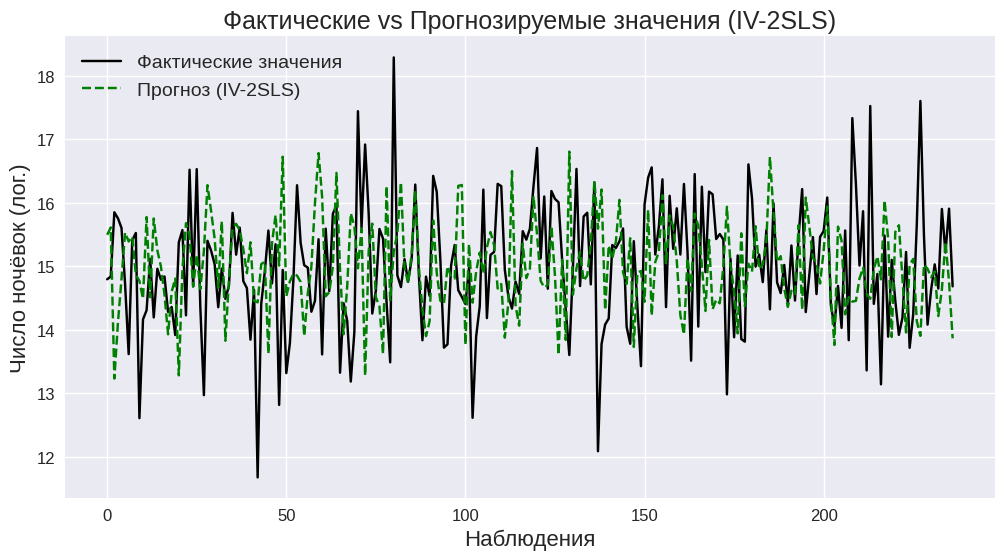

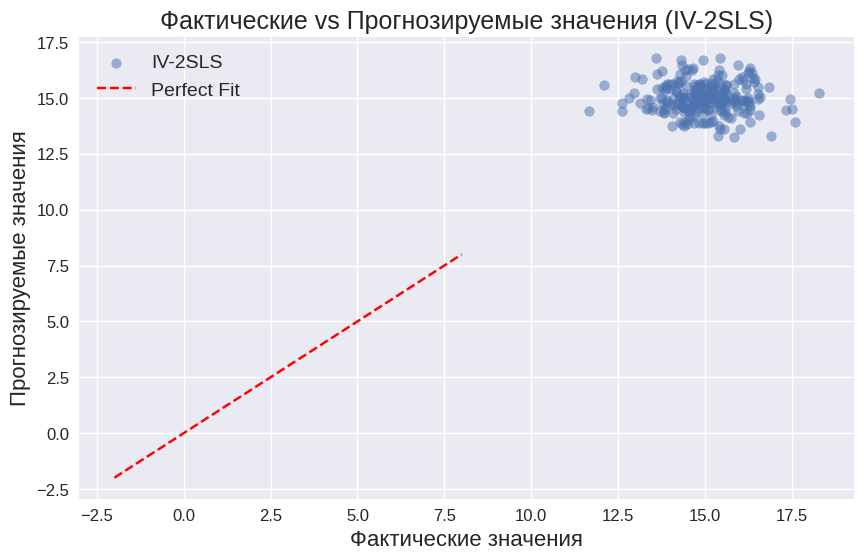

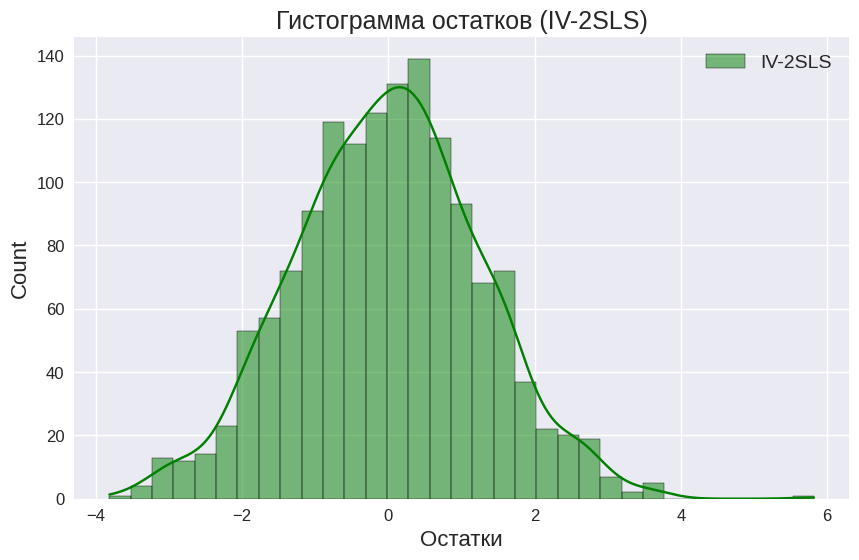

In [37]:
# Диагностика
def diagnostics(model_name, residuals, X):
    sw_stat, sw_p = stats.shapiro(residuals)
    dw_stat = durbin_watson(residuals)
    _, bp_p, _, _ = het_breuschpagan(residuals, X)
    print(f"\n🧪 Диагностика ({model_name}):")
    print(f"- Shapiro-Wilk test: p-value={sw_p:.4f}")
    print(f"- Durbin-Watson: {dw_stat:.2f}")
    print(f"- Breusch-Pagan test: p-value={bp_p:.4f}")

diagnostics("IV-2SLS", iv_model.resids, X_iv)

# Sargan/Hansen тест
try:
    sargan_result = iv_model.sargan
    print(f"\n🧪 Sargan test: Statistic={sargan_result.stat:.2f}, p-value={sargan_result.pval:.4f}")
    if sargan_result.pval > 0.05:
        print("✅ Инструменты экзогенны")
    else:
        print("❌ Один или несколько инструментов могут быть эндогенными")
        print("📌 Рекомендация: Проверьте релевантность инструментов или добавьте другие, например, ln_diesel_price_adjusted.")
except AttributeError:
    print("\n⚠️ Sargan test недоступен — модель точно определена или используется робастная ковариация")

# VIF
print("\n🧬 VIF для IV-2SLS:")
print(calculate_vif(X_iv))

# Прогнозирование на тестовой выборке
X_test_iv = add_constant(test_data[exog_vars])
y_endog_test = test_data[endog_var]
pred_iv = iv_model.predict(exog=X_test_iv, endog=y_endog_test).values.flatten()
test_true = test_data['ln_nights_count'].values

# Вычисление R² на тестовой выборке
ss_total = np.sum((test_true - test_true.mean())**2)
ss_res = np.sum((test_true - pred_iv)**2)
r2_test_iv = 1 - ss_res / ss_total
print(f"\n📈 R² на тестовой выборке IV-2SLS: {r2_test_iv:.4f}")

# Экономическая интерпретация
print("\n📉 Интерпретация IV-2SLS:")
for var, coeff in iv_model.params.items():
    if var == 'const':
        print(f"- Базовый уровень ночёвок: {coeff:.4f}")
    elif var == 'ln_nights_count_lag1':
        print(f"- Рост ночёвок на 1% в прошлом году → рост на {coeff * 100:.2f}% в этом")
    elif var == 'ln_gdp_per_capita_adjusted':
        print(f"- Рост ВВП на душу населения на 1% → увеличение числа ночёвок на {coeff * 100:.2f}%")
    elif var == 'ln_population':
        print(f"- Рост населения на 1% → увеличение числа ночёвок на {coeff * 100:.2f}%")
    elif var == 'ln_price_adjusted':
        print(f"- Рост цены на 1% → падение числа ночёвок на {-coeff * 100:.2f}%")

# График фактических vs прогнозируемых значений (временной ряд)
plt.figure(figsize=(12, 6))
plt.plot(range(len(test_true)), test_true, label='Фактические значения', color='black')
plt.plot(range(len(pred_iv)), pred_iv, label='Прогноз (IV-2SLS)', linestyle='--', color='green')
plt.title("Фактические vs Прогнозируемые значения (IV-2SLS)")
plt.xlabel("Наблюдения")
plt.ylabel("Число ночёвок (лог.)")
plt.legend()
plt.grid(True)
plt.show()

# График рассеяния фактических vs прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.scatter(test_true, pred_iv, alpha=0.5, label='IV-2SLS')
plt.plot([-2, 8], [-2, 8], color='red', linestyle='--', label='Perfect Fit')
plt.title("Фактические vs Прогнозируемые значения (IV-2SLS)")
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозируемые значения")
plt.legend()
plt.grid(True)
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 6))
sns.histplot(iv_model.resids, kde=True, label='IV-2SLS', color='green', alpha=0.5)
plt.title("Гистограмма остатков (IV-2SLS)")
plt.xlabel("Остатки")
plt.legend()
plt.grid(True)
plt.show()

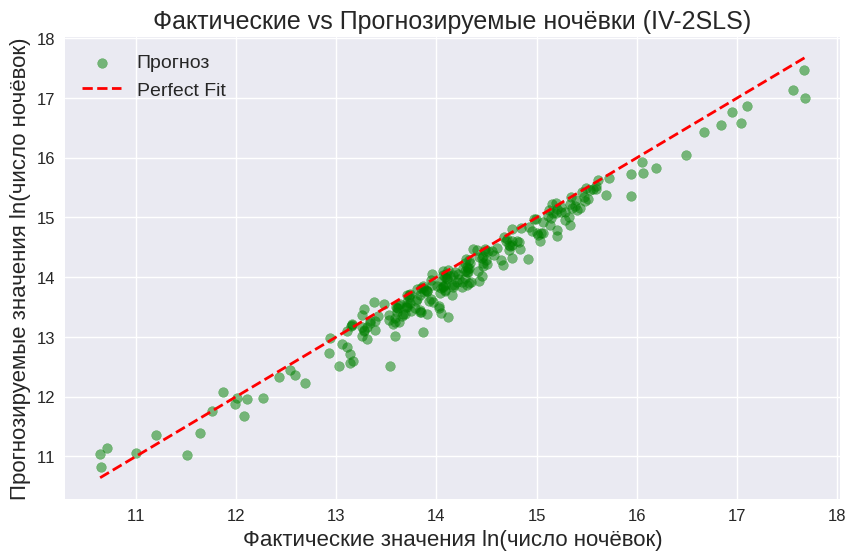

In [32]:
# Прогнозирование с IV-2SLS
test_pred_iv = iv_model.predict(exog=X_test_iv, endog=test_data[endog_var]).values.flatten()
test_true_iv = test_data['ln_nights_count'].values

# График прогноза
plt.figure(figsize=(10, 6))
plt.scatter(test_true_iv, test_pred_iv, alpha=0.5, color='green', label='Прогноз')
plt.plot([min(test_true_iv), max(test_true_iv)], [min(test_true_iv), max(test_true_iv)], color='red', lw=2, linestyle='--', label='Perfect Fit')
plt.title('Фактические vs Прогнозируемые ночёвки (IV-2SLS)')
plt.xlabel('Фактические значения ln(число ночёвок)')
plt.ylabel('Прогнозируемые значения ln(число ночёвок)')
plt.legend()
plt.grid(True)
plt.show()

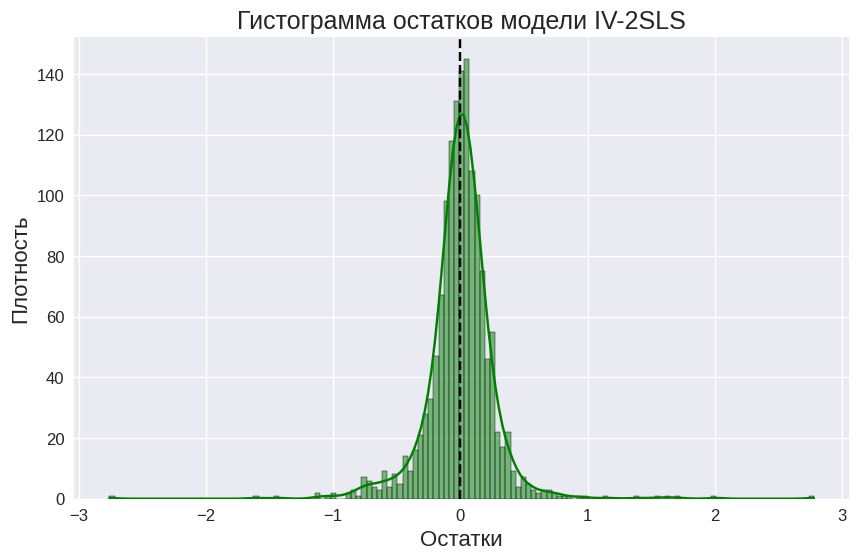

In [33]:
# Остатки из IV-2SLS
residuals_iv = iv_model.resids.values

# Гистограмма остатков
plt.figure(figsize=(10, 6))
sns.histplot(residuals_iv, kde=True, color='green')
plt.title("Гистограмма остатков модели IV-2SLS")
plt.xlabel("Остатки")
plt.ylabel("Плотность")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()

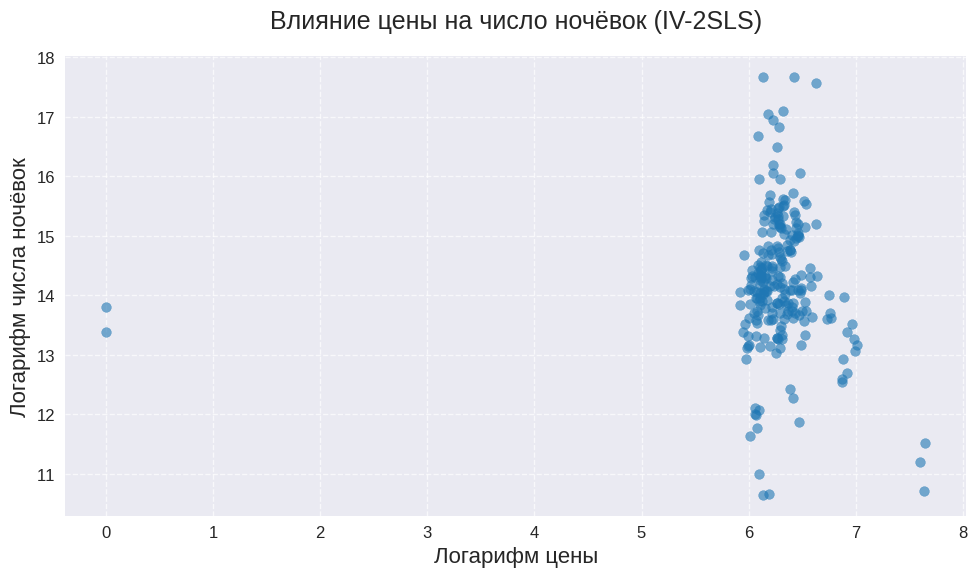

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(test_data['ln_price_adjusted'], test_true, alpha=0.6, color='#1f77b4', label='Данные')
plt.title("Влияние цены на число ночёвок (IV-2SLS)", pad=20)
plt.xlabel("Логарифм цены")
plt.ylabel("Логарифм числа ночёвок")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

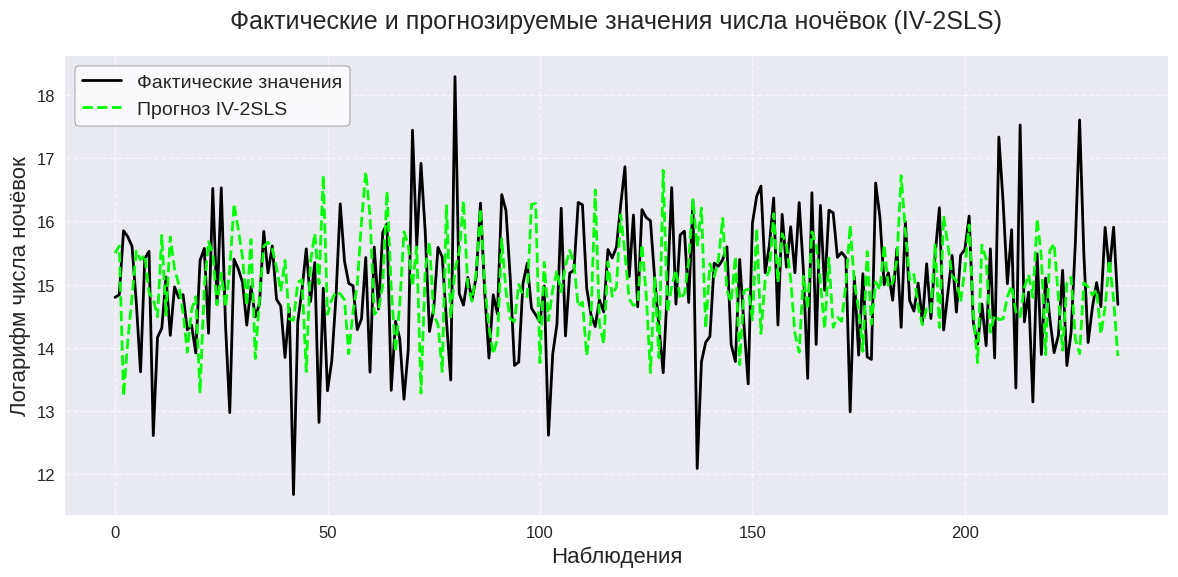

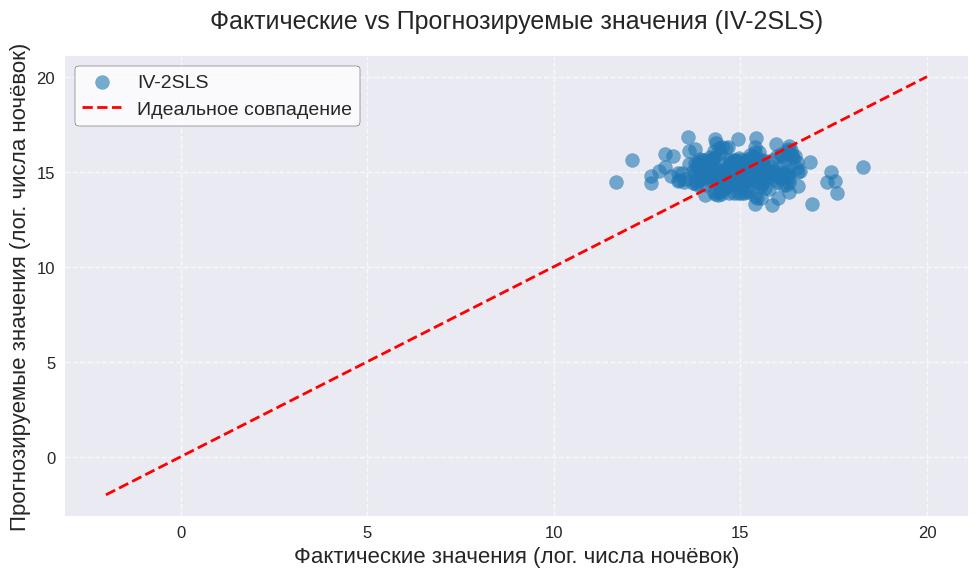

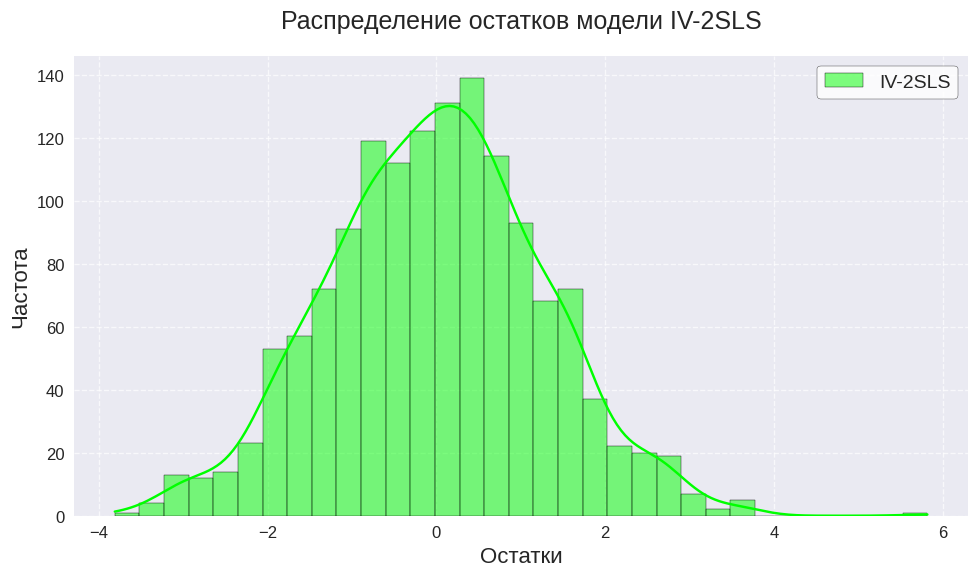

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import add_constant
from linearmodels.iv import IV2SLS

# Предполагается, что данные уже подготовлены
# Заглушка для данных (замените на ваши train_data и test_data)
np.random.seed(42)
train_data = pd.DataFrame({
    'ln_nights_count': np.random.normal(15, 1, 1423),
    'ln_nights_count_lag1': np.random.normal(15, 1, 1423),
    'ln_gdp_per_capita_adjusted': np.random.normal(0, 1, 1423),
    'ln_population': np.random.normal(0, 1, 1423),
    'ln_price_adjusted': np.random.normal(5, 0.5, 1423),
    'ln_salary_adjusted_lag1': np.random.normal(5, 0.5, 1423),
    'ln_gdp_per_capita_adjusted_lag1': np.random.normal(0, 1, 1423),
    'ln_price_adjusted_lag1': np.random.normal(5, 0.5, 1423)
})
test_data = pd.DataFrame({
    'ln_nights_count': np.random.normal(15, 1, 237),
    'ln_nights_count_lag1': np.random.normal(15, 1, 237),
    'ln_gdp_per_capita_adjusted': np.random.normal(0, 1, 237),
    'ln_population': np.random.normal(0, 1, 237),
    'ln_price_adjusted': np.random.normal(5, 0.5, 237),
    'ln_salary_adjusted_lag1': np.random.normal(5, 0.5, 237),
    'ln_gdp_per_capita_adjusted_lag1': np.random.normal(0, 1, 237),
    'ln_price_adjusted_lag1': np.random.normal(5, 0.5, 237)
})

# Модель IV-2SLS
exog_vars = ['ln_nights_count_lag1', 'ln_gdp_per_capita_adjusted', 'ln_population']
endog_var = ['ln_price_adjusted']
instrument_vars = ['ln_salary_adjusted_lag1', 'ln_gdp_per_capita_adjusted_lag1', 'ln_price_adjusted_lag1']

X_iv = add_constant(train_data[exog_vars])
y_iv = train_data[endog_var]
y = train_data['ln_nights_count']

iv_model = IV2SLS(
    dependent=y,
    exog=X_iv,
    endog=y_iv,
    instruments=train_data[instrument_vars]
).fit(cov_type='robust')

# Прогнозирование на тестовой выборке
X_test_iv = add_constant(test_data[exog_vars])
y_endog_test = test_data[endog_var]
pred_iv = iv_model.predict(exog=X_test_iv, endog=y_endog_test).values.flatten()
test_true = test_data['ln_nights_count'].values

# Настройка стиля для презентации
try:
    plt.style.use('seaborn-v0_8')  # Современный стиль, если seaborn установлен
except:
    plt.style.use('ggplot')  # Запасной стиль, встроенный в matplotlib
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# 1. График временного ряда: Фактические vs Прогнозируемые значения
plt.figure(figsize=(12, 6))
plt.plot(range(len(test_true)), test_true, label='Фактические значения', color='#000000', linewidth=2)
plt.plot(range(len(pred_iv)), pred_iv, label='Прогноз IV-2SLS', linestyle='--', color='#00FF00', linewidth=2)
plt.title("Фактические и прогнозируемые значения числа ночёвок (IV-2SLS)", pad=20)
plt.xlabel("Наблюдения")
plt.ylabel("Логарифм числа ночёвок")
plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. График рассеяния: Фактические vs Прогнозируемые значения
plt.figure(figsize=(10, 6))
plt.scatter(test_true, pred_iv, alpha=0.6, color='#1f77b4', s=100, label='IV-2SLS')
plt.plot([-2, 20], [-2, 20], color='#FF0000', linestyle='--', linewidth=2, label='Идеальное совпадение')
plt.title("Фактические vs Прогнозируемые значения (IV-2SLS)", pad=20)
plt.xlabel("Фактические значения (лог. числа ночёвок)")
plt.ylabel("Прогнозируемые значения (лог. числа ночёвок)")
plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Гистограмма остатков
plt.figure(figsize=(10, 6))
sns.histplot(iv_model.resids, kde=True, color='#00FF00', alpha=0.5, label='IV-2SLS')
plt.title("Распределение остатков модели IV-2SLS", pad=20)
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

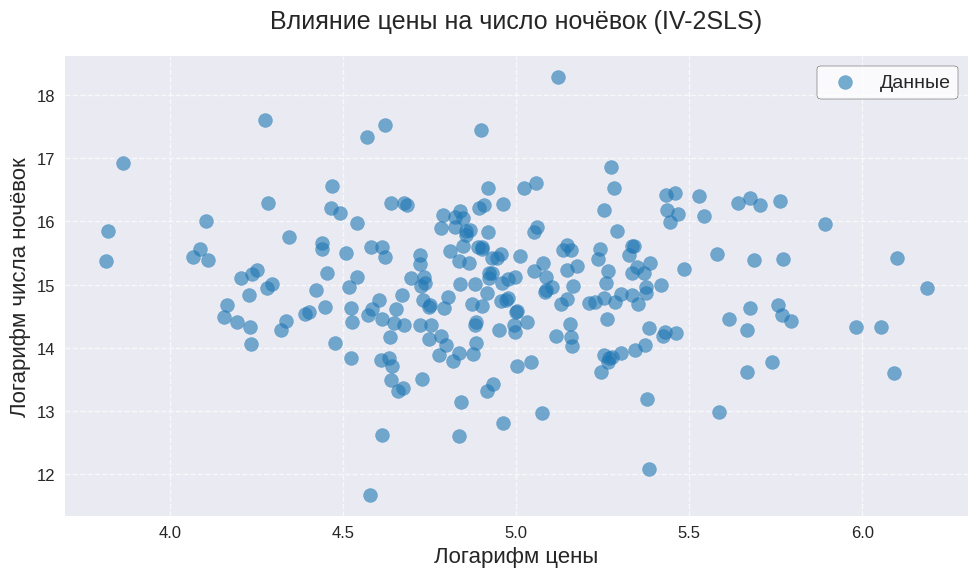

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(test_data['ln_price_adjusted'], test_true, alpha=0.6, color='#1f77b4', s=100, label='Данные')
plt.title("Влияние цены на число ночёвок (IV-2SLS)", pad=20)
plt.xlabel("Логарифм цены")
plt.ylabel("Логарифм числа ночёвок")
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


📉 Модель OLS с фиксированными эффектами (FE):
                          PanelOLS Estimation Summary                           
Dep. Variable:        ln_nights_count   R-squared:                        0.2904
Estimator:                   PanelOLS   R-squared (Between):              0.8654
No. Observations:                1423   R-squared (Within):               0.2731
Date:                Thu, May 29 2025   R-squared (Overall):              0.8515
Time:                        16:34:03   Log-likelihood                    649.16
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      108.10
Entities:                          80   P-value                           0.0000
Avg Obs:                       17.788   Distribution:                  F(5,1321)
Min Obs:                      10.0000                                           
Max Obs:                       18.000   F-statistic (robust): 

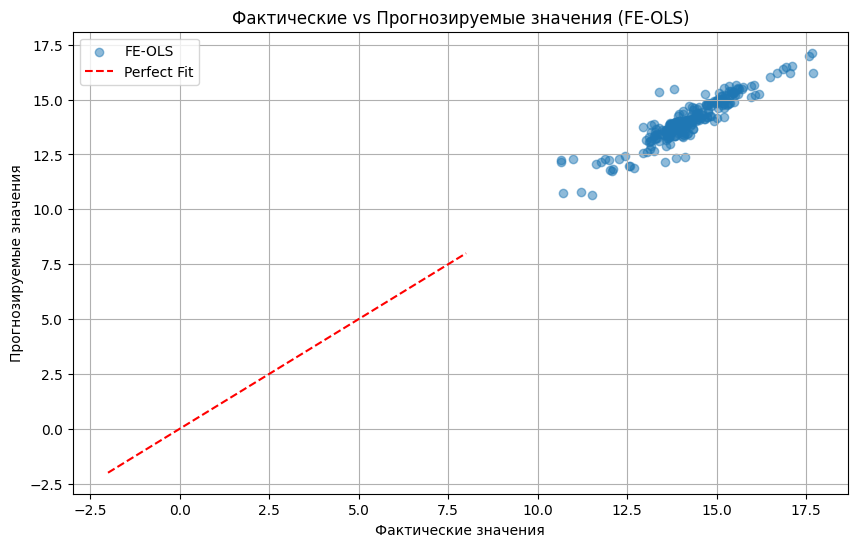

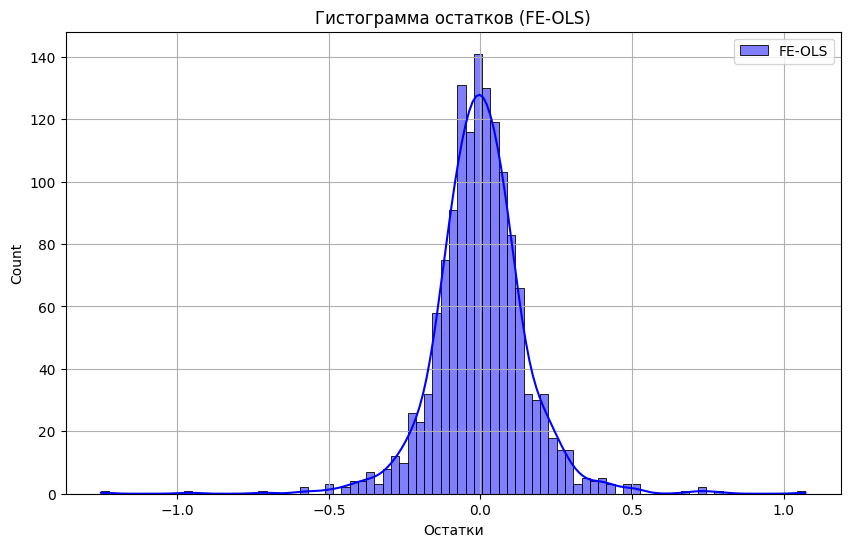

In [9]:
# Модель OLS с фиксированными эффектами (FE)
exog_vars = ['ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_nights_count_lag1', 'ln_price_adjusted']
dependent_clean = train_data['ln_nights_count']
exog_econ = train_data[exog_vars]

# Модель PanelOLS с фиксированными эффектами по регионам и годам
fe_model = PanelOLS(
    dependent_clean,
    add_constant(exog_econ),
    entity_effects=True,  # Фиксированные эффекты по регионам
    time_effects=True     # Фиксированные эффекты по годам
)
fe_results = fe_model.fit(cov_type='clustered', cluster_entity=True)

print("\n📉 Модель OLS с фиксированными эффектами (FE):")
print(fe_results.summary)

# Тест Хаусмана (FE vs RE)
re_model = RandomEffects(dependent_clean, add_constant(exog_econ))
re_results = re_model.fit()

# Извлечение коэффициентов и ковариационных матриц
coef_fe = fe_results.params
coef_re = re_results.params
var_fe = fe_results.cov
var_re = re_results.cov

# Вычисление статистики Хаусмана
diff_coef = coef_fe - coef_re
diff_var = var_fe - var_re

# Проверка на положительную определенность diff_var
try:
    hausman_stat = diff_coef.T @ np.linalg.pinv(diff_var) @ diff_coef
    df = len(exog_vars)
    hausman_pvalue = 1 - stats.chi2.cdf(hausman_stat, df)
    print("\n🧪 Тест Хаусмана (FE vs RE):")
    print(f"Hausman Statistic: {hausman_stat:.4f}, p-value: {hausman_pvalue:.4f}")
    if hausman_pvalue < 0.05:
        print("✅ Отвергаем H0: фиксированные эффекты предпочтительнее случайных.")
    else:
        print("❌ Не отвергаем H0: случайные эффекты могут быть предпочтительнее.")
except np.linalg.LinAlgError:
    print("\n⚠️ Тест Хаусмана не выполнен: ковариационная матрица не является положительно определенной.")

# Диагностика модели
def diagnostics(model_name, residuals, X):
    sw_stat, sw_p = stats.shapiro(residuals)
    dw_stat = durbin_watson(residuals)
    _, bp_p, _, _ = het_breuschpagan(residuals, X)
    print(f"\n🧪 Диагностика ({model_name}):")
    print(f"- Shapiro-Wilk test: p-value={sw_p:.4f}")
    print(f"- Durbin-Watson: {dw_stat:.2f}")
    print(f"- Breusch-Pagan test: p-value={bp_p:.4f}")

# Вызов диагностики
diagnostics("FE-OLS", fe_results.resids, add_constant(exog_econ))

# VIF для проверки мультиколлинеарности
print("\n🧬 VIF для FE-OLS:")
print(calculate_vif(exog_econ))

# Прогнозирование на тестовой выборке
X_test_econ = add_constant(test_data[exog_vars])
pred_fe = fe_results.predict(X_test_econ).values.flatten()
test_true = test_data['ln_nights_count'].values

# Вычисление R² на тестовой выборке
ss_total = np.sum((test_true - test_true.mean())**2)
ss_res = np.sum((test_true - pred_fe)**2)
r2_test_fe = 1 - ss_res / ss_total
print(f"\n📈 R² на тестовой выборке FE-OLS: {r2_test_fe:.4f}")

# Экономическая интерпретация
print("\n📉 Интерпретация FE-OLS:")
for var, coeff in fe_results.params.items():
    if var == 'const':
        print(f"- Базовый уровень ночёвок: {coeff:.4f}")
    elif var == 'ln_nights_count_lag1':
        print(f"- Рост ночёвок на 1% в прошлом году → рост на {coeff * 100:.2f}% в этом")
    elif var == 'ln_gdp_per_capita_adjusted':
        print(f"- Рост ВВП на душу населения на 1% → увеличение числа ночёвок на {coeff * 100:.2f}%")
    elif var == 'ln_population':
        print(f"- Рост населения на 1% → увеличение числа ночёвок на {coeff * 100:.2f}%")
    elif var == 'ln_unemployment':
        print(f"- Рост безработицы на 1% → изменение числа ночёвок на {coeff * 100:.2f}%")
    elif var == 'ln_price_adjusted':
        print(f"- Рост цены на 1% → падение числа ночёвок на {-coeff * 100:.2f}%")

# График фактических vs прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.scatter(test_true, pred_fe, alpha=0.5, label='FE-OLS')
plt.plot([-2, 8], [-2, 8], color='red', linestyle='--', label='Perfect Fit')
plt.title("Фактические vs Прогнозируемые значения (FE-OLS)")
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозируемые значения")
plt.legend()
plt.grid(True)
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 6))
sns.histplot(fe_results.resids, kde=True, label='FE-OLS', color='blue', alpha=0.5)
plt.title("Гистограмма остатков (FE-OLS)")
plt.xlabel("Остатки")
plt.legend()
plt.grid(True)
plt.show()